In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import os
warnings.filterwarnings('ignore')
%matplotlib inline
TITANIC_PATH = os.path.join("datasets","titanic")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_df=load_titanic_data("train.csv")
test_df=load_titanic_data("test.csv")

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Survived 0 =否，1 =是

pclass：Ticket class 1 = 1st，2 = 2nd，3 = 3rd

sex：男性或女性

age：年龄

sibsp：泰坦尼克号上的兄弟姐妹/配偶＃

parch：泰坦尼克号上的父母/孩子们

ticket：机票号码

fare：乘客做

cabin：机舱号码

embarked：登船港C =瑟堡，Q =皇后镇，S =南安普敦

缺少值 让我们定义一个函数，它将找到缺失值并绘制它们的频率。有了这些信息，我们可以相应地估算这些值。或者在Cabin功能的情况下删除它，因为输入没有多大意义。

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


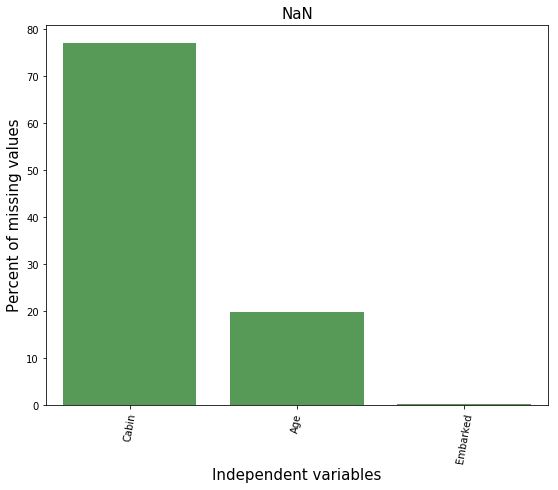

In [5]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms=ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(9,7))
    plt.xticks(rotation='80')
    fig=sns.barplot(ms.index,ms["Percent"],color="green",alpha=0.7)
    plt.xlabel('Independent variables',fontsize=15)
    plt.ylabel('Percent of missing values',fontsize=15)
    plt.title('NaN', fontsize=15)
    return ms

missingdata(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


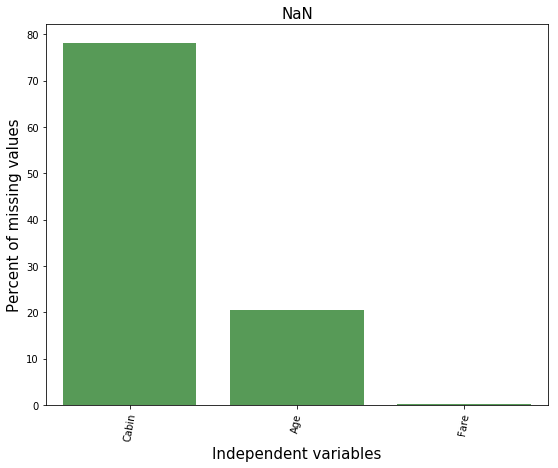

In [6]:
missingdata(test_df)

Text(0.5, 1.0, 'variable exporation')

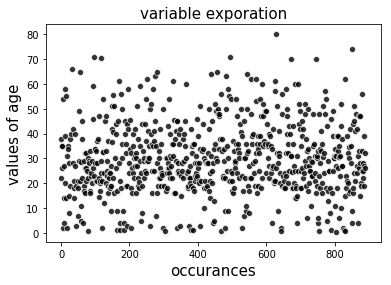

In [9]:
fig=sns.scatterplot(train_df.index, train_df["Age"],color="black", alpha=0.8)
plt.xlabel('occurances',fontsize=15)
plt.ylabel('values of age',fontsize=15)
plt.title('variable exporation',fontsize=15)

In [10]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace=True)
test_df.drop(drop_column, axis=1, inplace=True)

test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [12]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [13]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
